In [ ]:
from IPython.display import clear_output
!pip install tf_explain
clear_output()

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# common
from PIL import Image 
import cv2
import os
import keras
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi
!pip install keras


# Data
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Data Viz
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_image(image, SIZE):
    return np.round(tfi.resize(img_to_array(load_img(image))/255.,(SIZE, SIZE)),4)

def load_images(image_paths, SIZE, mask=False, trim=None):
    if trim is not None:
        image_paths = image_paths[:trim]
    
    if mask:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 1))
    else:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3))
    
    for i,image in enumerate(image_paths):
        img = load_image(image,SIZE)
        if mask:
            images[i] = img[:,:,:1]
        else:
            images[i] = img
    
    return images




In [ ]:
def show_image(image, title=None, cmap=None, alpha=1):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

'''def show_mask(image, mask, cmap=None, alpha=0.4):
    plt.imshow(image)
    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')'''

"def show_mask(image, mask, cmap=None, alpha=0.4):\n    plt.imshow(image)\n    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)\n    plt.axis('off')"

In [ ]:
SIZE = 256

root_path = '/content/drive/My Drive/APS360_Project/Dataset/'
classes = sorted(os.listdir(root_path))
classes


['normal', 'tumour']

In [ ]:
classes

['normal', 'tumour']

In [ ]:
classes[1]

'tumour'

In [ ]:
single_mask_paths = sorted(glob(root_path + "tumour"+"/*_mask.png")) 
double_mask_paths = sorted(glob(root_path + "tumour"+"/*mask_1.png"))

In [ ]:
single_mask_paths

In [ ]:
double_mask_paths

In [ ]:
len(double_mask_paths)
print(len(single_mask_paths))

647


In [ ]:
from numpy.lib.type_check import imag
for path in double_mask_paths:
  img = np.zeros((1,SIZE,SIZE,3))
  mask1path = path.replace('_1',"")
  mask1 = load_image(mask1path, SIZE)
  mask2 = load_image(path, SIZE)
  img = img+ mask1 + mask2
  img = img[0,:,:,0]*255
  
  img = img.astype(np.uint8)

  img = Image.fromarray(img)
  #saved=mask1path.replace("tumour")
  img.save(mask1path)



In [ ]:
n_masked_paths = sorted(glob(root_path + "normal"+"/*_mask.png")) 
n_masked_paths

In [ ]:
t_image_paths = []
t_mask_paths = []
for path in single_mask_paths:
    img_path = path.replace('_mask','')
    t_image_paths.append(img_path)
    t_mask_paths.append(path)

In [ ]:
n_image_paths = []
n_mask_paths = []
for path in n_masked_paths:
    img_path = path.replace('_mask','')
    n_image_paths.append(img_path)
    n_mask_paths.append(path)

In [ ]:
n_mask_paths

['/content/drive/My Drive/APS360_Project/Dataset/normal/normal (1)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (10)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (100)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (101)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (102)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (103)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (104)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (105)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (106)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (107)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (108)_mask.png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (109)_mask.png',
 '/content/drive/My Drive/APS360_Project/Da

In [ ]:
n_image_paths 


['/content/drive/My Drive/APS360_Project/Dataset/normal/normal (1).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (10).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (100).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (101).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (102).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (103).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (104).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (105).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (106).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (107).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (108).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (109).png',
 '/content/drive/My Drive/APS360_Project/Dataset/normal/normal (11).png',
 '/content/drive/My Drive/APS

In [ ]:
print(len(n_image_paths))
print(len(n_mask_paths))
print(len(t_mask_paths))
print(len(t_image_paths))

133
133
647
647


In [ ]:
z = 0
for path in t_mask_paths:
  directory = '/content/drive/My Drive/APS360_Project/Dataset/t_masked'
  img = cv2.imread(path) 
  os.chdir(directory)  
  filename = str(z)+".png"
  cv2.imwrite(filename, img) 
  z =z + 1

In [ ]:
k = 0
for path in t_image_paths:
  directory = '/content/drive/My Drive/APS360_Project/Dataset/t_image'
  img = cv2.imread(path) 
  os.chdir(directory)  
  filename = str(k)+".png"
  cv2.imwrite(filename, img) 
  k =k + 1

In [ ]:

i = 0
for path in n_mask_paths:
  directory = '/content/drive/My Drive/APS360_Project/Dataset/n_masked'
  img = cv2.imread(path) 
  os.chdir(directory)  
  filename = str(i)+".png"
  cv2.imwrite(filename, img) 
  i =i + 1

In [ ]:
j = 0
for path in n_image_paths:
  directory = '/content/drive/My Drive/APS360_Project/Dataset/n_image'
  img = cv2.imread(path) 
  os.chdir(directory)  
  filename = str(j)+".png"
  cv2.imwrite(filename, img) 
  j =j + 1


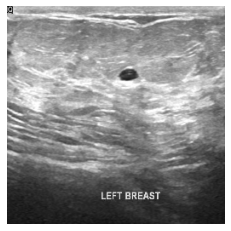

In [ ]:
show_image(load_image(image_paths[0], SIZE))

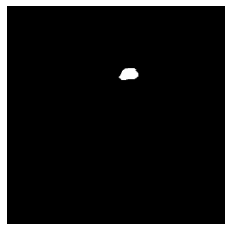

In [ ]:
show_image(load_image(mask_paths[0], SIZE))

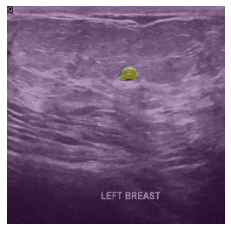

In [ ]:
#show_mask(load_image(image_paths[0], SIZE), load_image(mask_paths[0], SIZE)[:,:,0])

In [ ]:

double_mask_paths
#len(image_paths)
#len(mask_paths)

[[],
 [],
 ['/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (163)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (173)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (181)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (195)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (25)_mask_1.png',
  '/content/drive/My Drive/APS360_Project/Dataset_BUSI_with_GT/benign/benign (315)_mask_1.png']]

In [ ]:
images = load_images(image_paths, SIZE)
masks = load_images(mask_paths, SIZE, mask=True)

FileNotFoundError: ignored